In [1]:
from compress import *
%matplotlib inline

In [2]:
# Load an color image in grayscale
img_array = cv.imread("./60state.png", cv.IMREAD_GRAYSCALE)
img_array.shape

(1600, 1200)

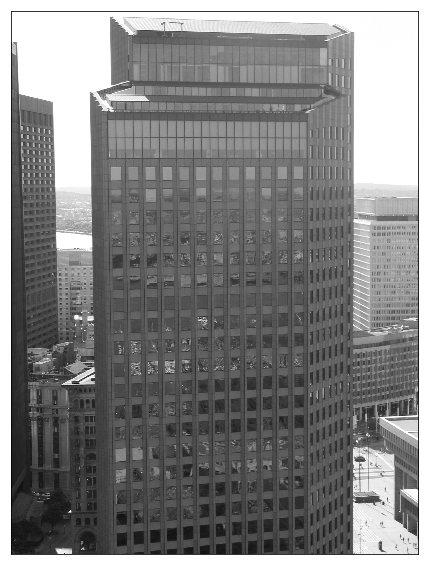

In [3]:
fig, ax = plt.subplots(figsize=(10,10))
plt.xticks([])
plt.yticks([])
ax.imshow(img_array, 'gray', aspect='equal')

plt.show()

In [4]:
block_size = 8
blocks = img2blocks(img_array, block_size)

### Applying DCT

In [5]:
dct_blocks = {block_idx: cv.dct(block_data) for block_idx, block_data in blocks.items()}

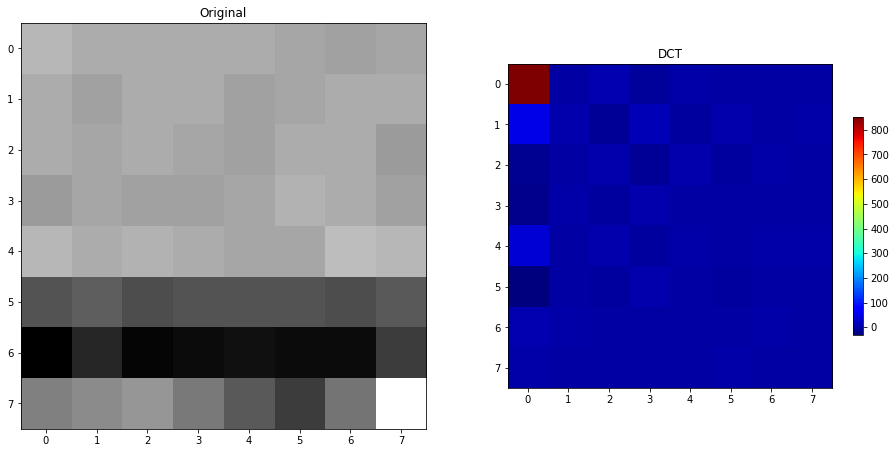

In [6]:
f, axarr = plt.subplots(1,2, figsize=(16, 16))
axarr[0].set_title("Original")
im = axarr[0].imshow(blocks[(80, 100)], 'gray')

axarr[1].set_title("DCT")
dct_im = axarr[1].imshow(dct_blocks[(80, 100)], cm.jet)

f.colorbar(dct_im, shrink=0.25)


plt.show()

### Inverse DCT (Reconstructing the image)

In [7]:
idct_blocks = {block_idx: cv.idct(dct_values) for block_idx, dct_values in dct_blocks.items()}

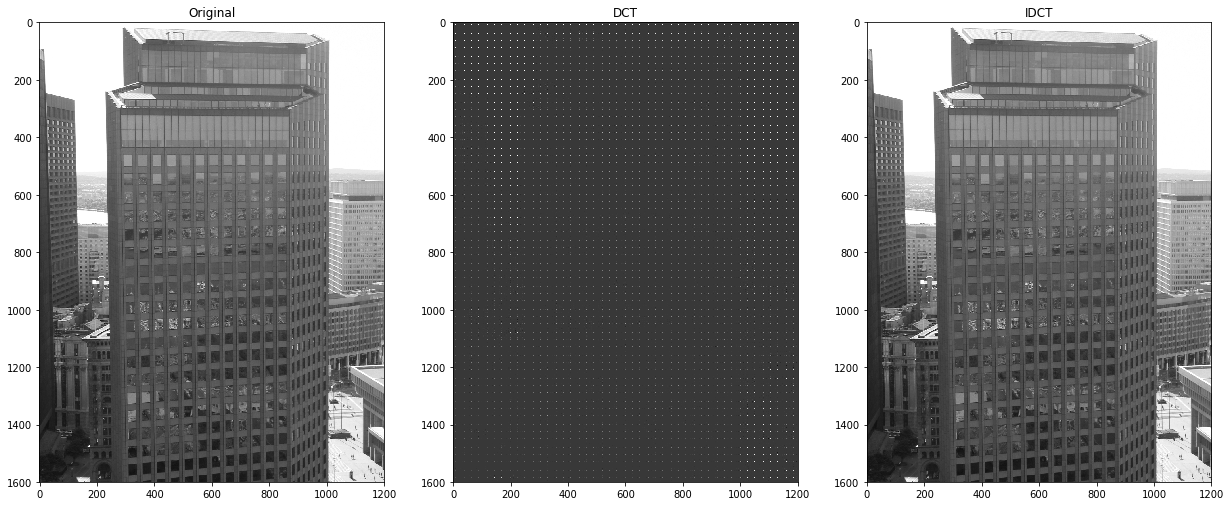

In [8]:
plot_imgs({"Original":img_array, "DCT":blocks2img(dct_blocks), "IDCT":blocks2img(idct_blocks)})

### Quantization Tables

### Using Quantization

In [9]:
Q50_blocks = quantize(dct_blocks, Q50)
Q90_blocks = quantize(dct_blocks, Q90)
Q10_blocks = quantize(dct_blocks, Q10)

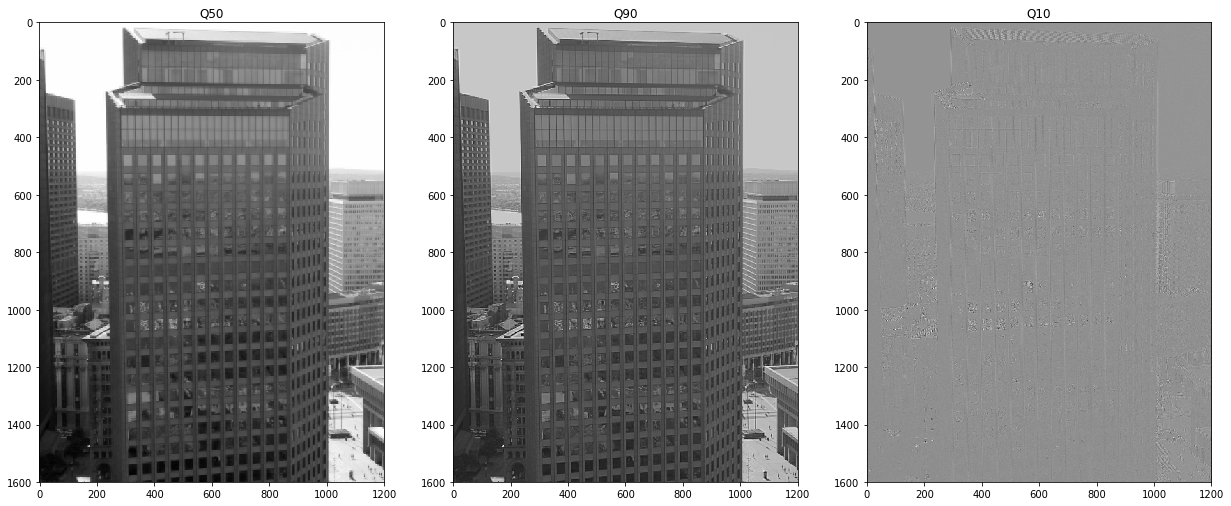

In [10]:
Q_dct_blocks = {"Q50":Q50_blocks, "Q90":Q90_blocks, "Q10":Q10_blocks}
Q_idct_blocks = {title:
                 { idx:cv.idct(block) for idx, block in blocks.items()
                 } for title, blocks in Q_dct_blocks.items()
                }

reconstructed_images = {title: blocks2img(blocks) for title, blocks in Q_idct_blocks.items()}
plot_imgs(reconstructed_images)

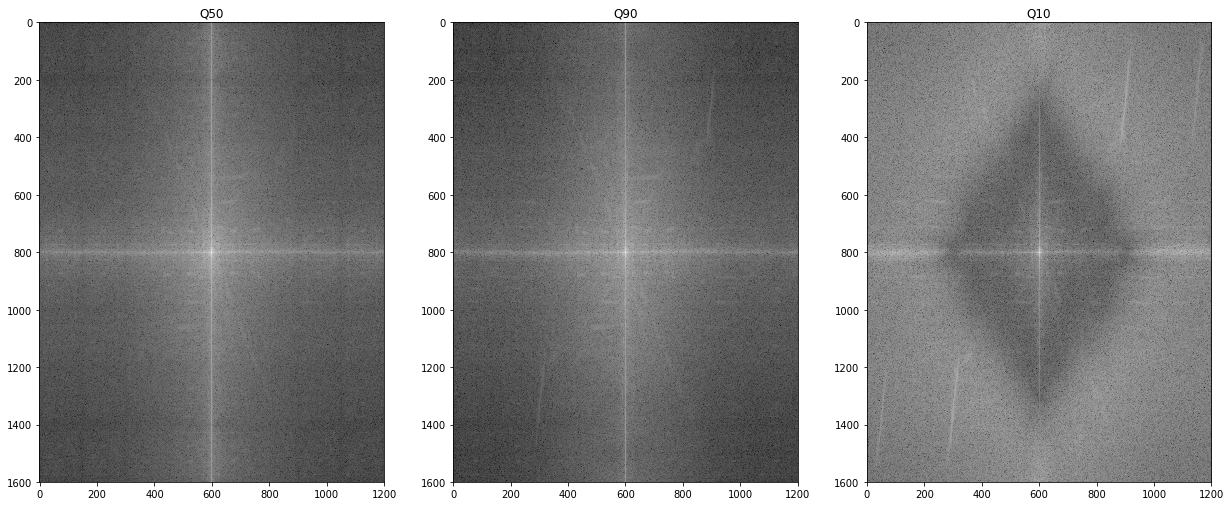

In [20]:
img2fft = lambda img: np.fft.fft2(img)
shift_fft = lambda fft_vals: np.fft.fftshift(fft_vals)
fft2magnitude_spectrum = lambda fshift: 20*np.log(np.abs(fshift))

img2magnitude_spectrum = lambda img: fft2magnitude_spectrum(shift_fft(img2fft(img)))
fft_imgs = {
    q:img2magnitude_spectrum(img) for q, img in reconstructed_images.items()}
plot_imgs(fft_imgs)